In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [2]:
# import the data
path = "../data/playstation.csv"
df = pd.read_csv(path)
df.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
0,1.883680e+14,Paid,Wallet,1 month,Reclaim,2020-03-15,2020-04-15
1,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-04-15,2020-05-15
2,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-05-16,2020-06-16
3,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-06-16,2020-07-16
4,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-07-16,2020-08-16


In [3]:
# change format to datetime
df["SUB_START_DATE"] = pd.to_datetime(df["SUB_START_DATE"])
df["SUB_END_DATE"] = pd.to_datetime(df["SUB_END_DATE"])

# How many people were on a trial on the 1st of October

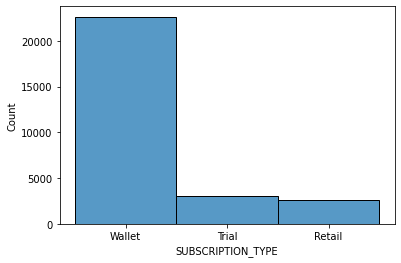

In [4]:
sns.histplot(data=df, x="SUBSCRIPTION_TYPE");

In [5]:
df_trial = df[df["SUBSCRIPTION_TYPE"] == "Trial"]
df_trial.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
9,7.157850e+14,Free,Trial,14 days,Trial,2019-07-02,2019-07-16
12,2.763320e+14,Free,Trial,14 days,Trial,2020-02-16,2020-03-01
19,3.930190e+14,Free,Trial,14 days,Trial,2020-08-26,2020-09-09
20,3.392980e+14,Free,Trial,14 days,Trial,2019-11-02,2019-11-16
40,3.775590e+14,Free,Trial,14 days,Trial,2020-08-04,2020-08-18


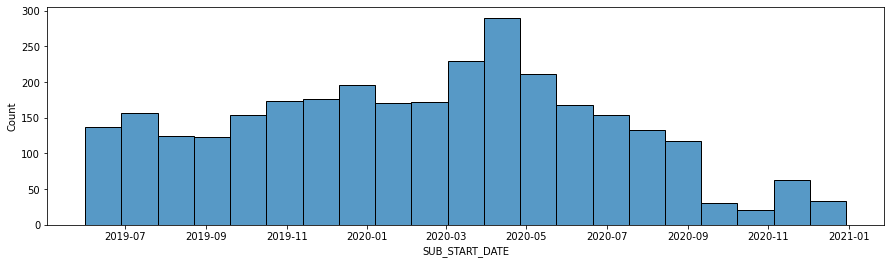

In [6]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_trial, x="SUB_START_DATE");

In [7]:
mask = ((df_trial["SUB_START_DATE"] <= pd.to_datetime("2019-10-01")) & \
           (df_trial["SUB_END_DATE"] >= pd.to_datetime("2019-10-01"))) | \
       ((df_trial["SUB_START_DATE"] <= pd.to_datetime("2020-10-01")) & \
           (df_trial["SUB_END_DATE"] >= pd.to_datetime("2020-10-01")))

df_trial = df_trial[mask]

df_trial.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
630,2.263220e+14,Free,Trial,14 days,Trial,2019-09-25,2019-10-09
868,6.588970e+14,Free,Trial,14 days,Trial,2019-09-30,2019-10-14
977,1.960290e+14,Free,Trial,14 days,Trial,2019-09-19,2019-10-03
2223,7.000940e+14,Free,Trial,14 days,Trial,2019-10-01,2019-10-15
3002,6.082880e+14,Free,Trial,14 days,Trial,2020-09-29,2020-10-13


In [8]:
len(df_trial)

92

In [9]:
print(f"There was {len(df_trial)} people on trial plan on October first 2019 and 2020")

There was 92 people on trial plan on October first 2019 and 2020


In [10]:
# This feels like a school exercice, I'm not having fun :-(